In [1]:
import pandas as pd
import numpy as np
from scipy import linalg
import sys
sys.path.append("..")
import os
from qkids import Week
from qkids.DatabasePool import get_schedule_connection
from schedule.DataFarm import DataFarm
import matplotlib.pyplot as plt
from odps import ODPS
odps = ODPS('LTAItDVDpC9aEMXJ', 'U6iEFCZCzoPUbjou1FW45SQruxIfFt', 'Qkids_V2')
from sklearn.linear_model import LinearRegression

In [2]:
datafarm = DataFarm()
historical_data = datafarm.run()

In [3]:
week_series = historical_data.sum().sort_index()
week_series.name= 'history'
# week_data = week_data    # 2018年以来 没周人数


vacation_week_weight = pd.Series({'201826':0.5,
                            '201827':0.6,
                            '201828':0.7,
                            '201829':0.8,
                            '201830':0.9,
                            '201831':0.9,
                            '201832':0.9,
                            '201833':1,
                            '201834':1,
                            '201835':1,
                            '201904': 0.5,
                            '201905': 0.6,
                            '201906': -0.1,
                            '201907': 0.65,
                            '201908': 0.5,  # 虽然没有全天 但是暑假券还能用
                            '201909': 0.5,   # 虽然没有全天 但是暑假券还能用
                             '201927': 0.3,
                            '201928': 0.35,
                            '201929': 0.45,
                            '201930': 0.55,
                            '201931': 0.45,
                            '201932': 0.45,
                            '201933': 0.45,
                            '201934': 0.45,
                            '201935': 0.45,
                            },name = 'vacation')
whole_day_week = pd.Series(0, index = week_series.index, dtype='float')   # 寒暑假课
for i, value in vacation_week_weight.items():
    whole_day_week[i] = value
week_data = pd.concat([week_series, vacation_week_weight], axis=1, sort=False).fillna(0)

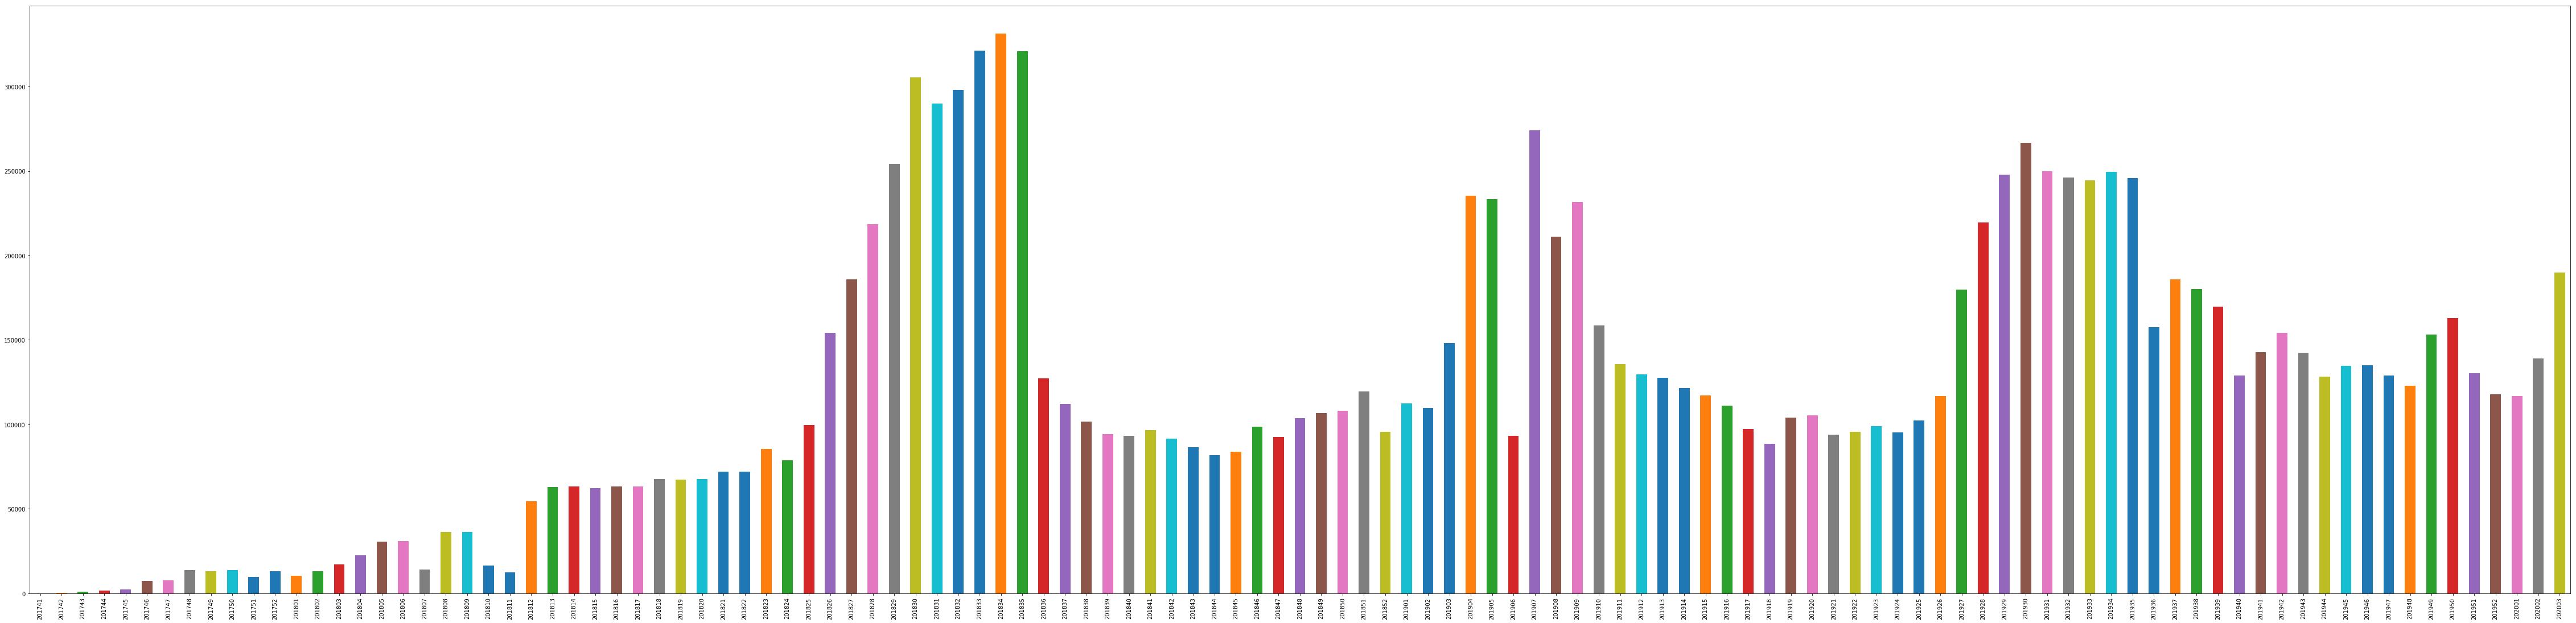

In [21]:
# 每周实际数据
plt.figure(0)
week_series.plot(figsize=(80, 19), label='111', kind='bar')

In [22]:
# 之前的数据都很乱 直到   开始正式记录预测数据
futures = []
for i in os.walk("../output"):
    future_file = "future.pkl" 
    if future_file in i[2]:
        filename = i[0] + '/' + future_file
        s = pd.read_pickle(filename)
        s.name = i[0][-6:]
        futures.append(s)
predict_data = pd.DataFrame(futures)

In [23]:
week_predict_series = predict_data.sum(axis=1)
week_predict_series.name = 'predict'
week_predict_series = week_predict_series.sort_index()

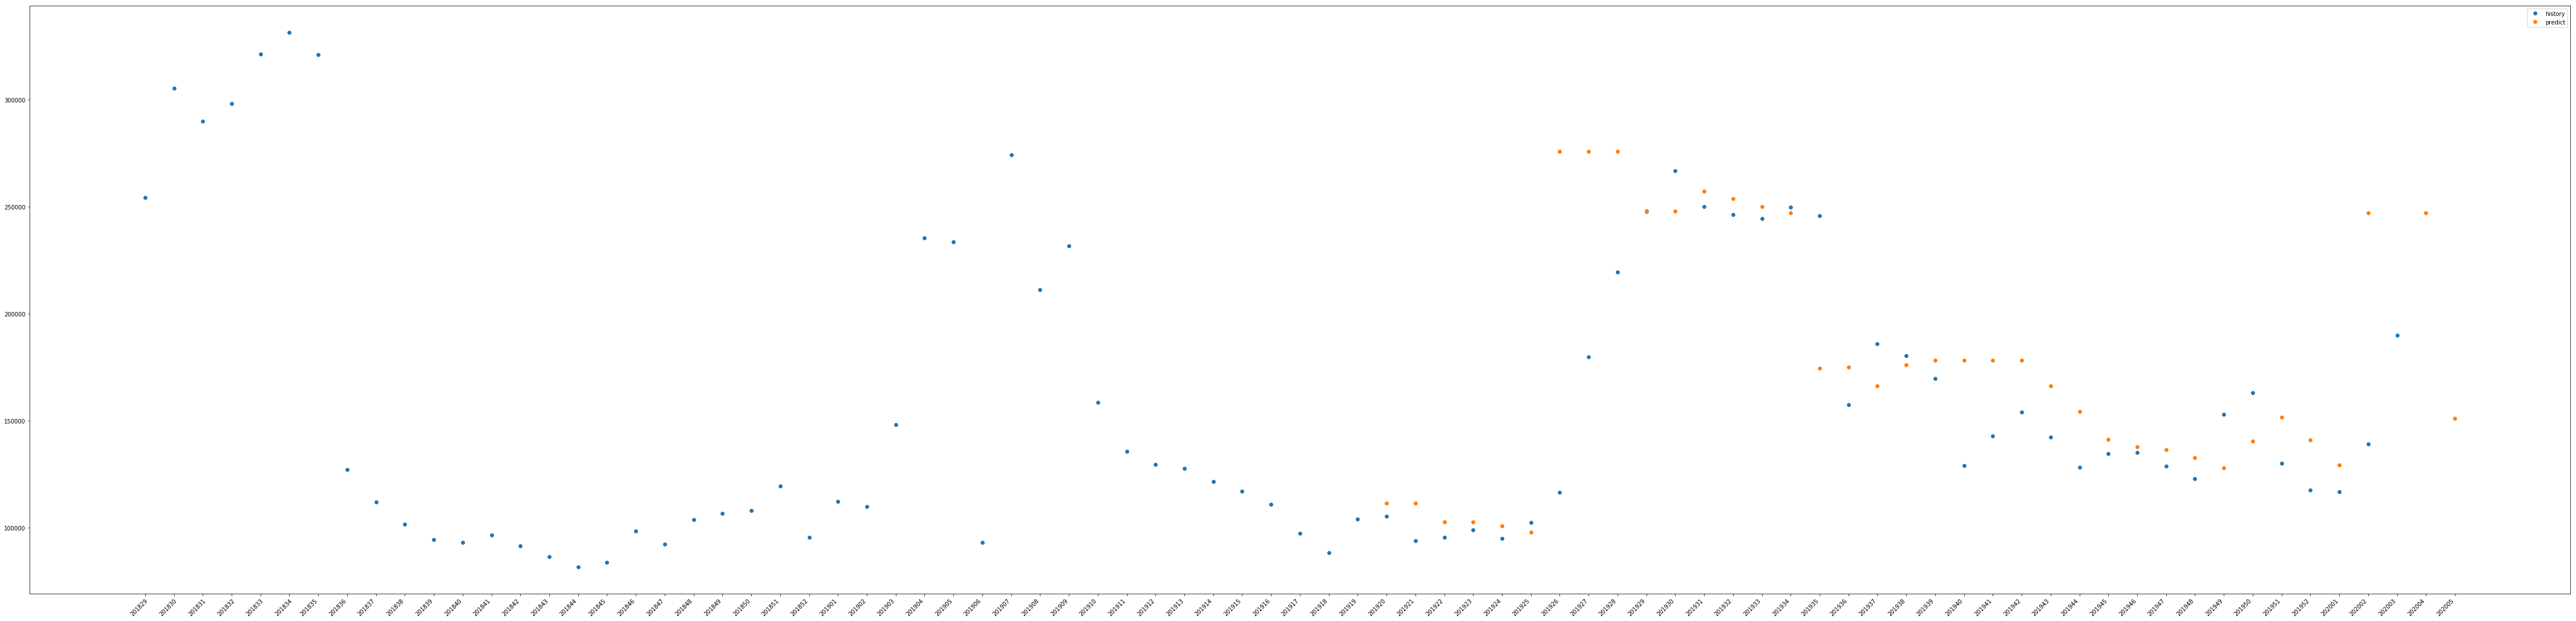

In [29]:
fig = plt.figure(1, figsize=(80, 19))
ax = fig.add_subplot(111)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
ax.plot(week_series.index[40:], week_series.values[40:], 'o', label='history')
ax.plot(week_predict_series.index, week_predict_series.values, 'o',label="predict")
ax.legend(loc="upper right")

In [4]:
week_series

201741        32.0
201742       239.0
201743       875.0
201744      1707.0
201745      2131.0
201746      7173.0
201747      7775.0
201748     13587.0
201749     12937.0
201750     13765.0
201751      9551.0
201752     12929.0
201801     10237.0
201802     12870.0
201803     17088.0
201804     22554.0
201805     30690.0
201806     30822.0
201807     13957.0
201808     36268.0
201809     36430.0
201810     16354.0
201811     12390.0
201812     54434.0
201813     62940.0
201814     63105.0
201815     62286.0
201816     63388.0
201817     63106.0
201818     67481.0
            ...   
201926    116633.0
201927    179802.0
201928    219506.0
201929    247773.0
201930    266701.0
201931    249912.0
201932    246182.0
201933    244305.0
201934    249668.0
201935    245637.0
201936    157541.0
201937    185942.0
201938    180245.0
201939    169581.0
201940    128990.0
201941    142809.0
201942    154107.0
201943    142391.0
201944    128111.0
201945    134504.0
201946    135043.0
201947    12